In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разминка (4 балла)

## 1.1 Создание матриц (0.25 балла)

Создайте 4 матрицы
- A - "шахматную" из нулей и единиц, размера 6 на 3, левое верхнее значение (A[0][0]) равно 1,
- В - из чисел от 1 до 24, записанных в виде змейки, размера 6 на 4,
- C - из случайных целых чисел от 2 до 10 (обе границы включительно), размера 4 на 3
- D - из нулей с единичками на главной диагонали, размера 4 на 4.

**Создайте из этих матриц "лоскутную" матрицу S**

A В

С D

используя **только стандартные** операции numpy. Comprehensions использовать нельзя.

После этого допишите к полученной матрице S матрицу F размера 10 на 2 из нулей, чтобы получилась матрица G:

S F

P.S. Когда мы говорим, что матрица имеет размер x на y, x - количество строк, y - количество столбцов.

In [24]:
A = np.zeros((6,3))
A[::2, ::2] = 1
A[1::2, 1::2] = 1

B = np.arange(1,25)
B = np.reshape(B, (6, 4))
B[::2] = B[::2][:, ::-1]
B = B[:, ::-1]

C = np.random.randint(2, 10, 12)
C = np.reshape(C, (4, 3))

D = np.eye(4, 4)

S = np.concatenate((np.concatenate((A, B), axis = 1), np.concatenate((C, D), axis = 1)))

F = np.zeros((10,2))

G = np.concatenate((S, F), axis = 1)

G

array([[ 1.,  0.,  1.,  1.,  2.,  3.,  4.,  0.,  0.],
       [ 0.,  1.,  0.,  8.,  7.,  6.,  5.,  0.,  0.],
       [ 1.,  0.,  1.,  9., 10., 11., 12.,  0.,  0.],
       [ 0.,  1.,  0., 16., 15., 14., 13.,  0.,  0.],
       [ 1.,  0.,  1., 17., 18., 19., 20.,  0.,  0.],
       [ 0.,  1.,  0., 24., 23., 22., 21.,  0.,  0.],
       [ 9.,  4.,  7.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 4.,  7.,  3.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 9.,  4.,  9.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 2.,  6.,  9.,  0.,  0.,  0.,  1.,  0.,  0.]])

## 1.2 Поиск ближайшего соседа (0.25 балла)

Реализуйте функцию, принимающую на вход матрицу X и некоторое число a и возвращающую ближайший к числу элемент матрицы.
Например, для X = np.arange(0,10).reshape((2, 5)) и a = 3.6 ответом будет 4. Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

In [25]:
def find_nearest_neighbour(X, a):
  rows, cols = X.shape
  matrix_iz_a = np.tile(a, (rows, cols))
  newmatrix = X - matrix_iz_a
  newmatrix = np.abs(newmatrix)
  indexmin = np.argmin(newmatrix)
  arr = np.array(X).ravel()
  return arr[indexmin]

X = np.arange(0,10).reshape((2, 5))
a = 3.6
find_nearest_neighbour(X, a)

4

## 1.3 Очень странная нейросеть (0.25 балла)

Реализуйте одну очень странную нейросеть. Нейросеть должна:

- Возводить матрицу A (матрицу весов) размера N x N в квадрат
- В качестве первого преобразования умножать вектор X длины N (вектор признаков) на матрицу весов A**2 (на выходе получается новый вектор);
- В качестве второго преобразования умножать вектор, полученный на прошлом шаге, на вектор b (вектор весов) размера N (на выходе получается скалярное число).

Считаем, что все числа (элементы матриц и векторов) - числа с плавающей точкой.

In [23]:
# Придумайте свои данные для примера, N >= 4
A = np.random.randn(4, 4)
b = np.random.randn(4, 1)
X = np.random.randn(1, 4)

def very_strange_neural_network(A, b, X):
    doubleA = A @ A
    vec1 = X @ doubleA
    scalar = vec1 @ b
    return scalar


print(very_strange_neural_network(A, b, X))

[[-0.89031432]]


## 1.4 Джунгли зовут! (0.25 балла)

Перед вами матрица M - карта местности тяжелопроходимых джунглей, составленная Ларой Крофт. На карте каждая ячейка - целое число, обозначающее высоту над уровнем моря (если число больше нуля) в метрах или глубину моря (если число меньше нуля) в метрах в данной ячейке карты размером метр на метр. Если число 0, то это часть суши - берег.


Вам необходимо посчитать:
- Общую площадь клеточек моря, в которых его глубина больше 5 (в м^2)
- Общий объём всей воды на карте (в м^3)
- Максимальную высоту над уровнем моря, которая есть на этой карте (в м)

In [26]:
def find_deep_sea_area(M):
    index = np.where(M < -5)
    negative_array = M[index]
    return len(negative_array)

def find_water_volume(M):
    index = np.where(M < 0)
    negative_array = M[index]
    return abs(sum(negative_array))

def find_max_height(M):
    return np.max(M)

In [27]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Общая площадь моря на карте -", find_deep_sea_area(M), "м^2")
print("Общий объем воды на карте -", find_water_volume(M), "м^3")
print("Максимальный уровень над уровнем моря на карте -", find_max_height(M), "м")

Общая площадь моря на карте - 1 м^2
Общий объем воды на карте - 21 м^3
Максимальный уровень над уровнем моря на карте - 25 м


## 1.5 Острова сокровищ (0.25 балла)


На вход функции подаётся массив a из нулей и единиц. Необходимо посчитать, сколько в массиве есть блоков из идущих подряд единиц (островков). Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.diff`

In [28]:
def count_all_islands(a):
    a = np.concatenate((np.array([0]), a)) #если остров находится в начале
    arr = np.diff(a)
    return (arr == np.ones((1, len(arr)))).sum()

In [29]:
# можно подставить свой пример

a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# простая проверка для примера выше
assert count_all_islands(a) == 4
print(count_all_islands(a))

4


## 1.6 Маскарад (0.25 балла)

На вход идёт 2-мерная матрица X, заполненная числами с плавающей точкой, и дробное число a. Нужно заменить все ячейки в матрице, которые больше, чем а, на среднее значение среди элементов матрицы Х.

**Нужно** пользоваться базовыми функциями numpy, **нельзя** пользоваться циклами.

In [30]:
def swap_mask_for_average(X, a):
    razmer = X.shape[0] * X.shape[1]
    arg = np.sum(X) / razmer
    X[X > a] = arg
    return X

In [31]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5

# простая проверка для примера выше
assert np.allclose(swap_mask_for_average(M, a),
                   np.array([
                       [-7, -3, -1, 0],
                       [-4, -3, 1, 2],
                       [-2, 0, 4, 2],
                       [-1, 3, 2, 2]
                   ]))

swap_mask_for_average(M, a)

array([[-7, -3, -1,  0],
       [-4, -3,  1,  2],
       [-2,  0,  4,  2],
       [-1,  3,  2,  2]])

## 1.7 По горячим трейсам (0.25 балла)

На вход приходит квадратная матрица М, надо посчитать разницу между суммой по главной и побочной диагоналями матрицы.


Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.trace`

In [32]:
def count_trace_diff(M):
    return np.trace(M) - np.trace(M[:, ::-1])

In [33]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.allclose(count_trace_diff(M), 3)

count_trace_diff(M)

3

## 1.8 Царь горы (0.25 балла)

На вход приходит вектор a размера N. Необходимо при помощи сложения, конкатенации, бродкастинга получить симметричную матрицу размера 2N x 2N, у которой в середине максимальное значение, а к краям оно убывает.

Пример: a = (0, 1, 2)

Результат:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [34]:
def create_mountain(a):
    arr = np.array([a] * len(a))
    arr2 = a.reshape((len(a), 1))
    A = arr + arr2 #левый верхний угол
    B = A[:, ::-1] #правый верхний угол
    C = A[::-1] #левый нижний угол
    D = A[::-1, ::-1] #правый нижний угол

    S = np.concatenate((np.concatenate((A, B), axis = 1), np.concatenate((C, D), axis = 1))) # A B
                                                                                             # C D
    return S

In [35]:
# Можно подставить свой пример
a = np.array([0, 1, 2])

create_mountain(a)

array([[0, 1, 2, 2, 1, 0],
       [1, 2, 3, 3, 2, 1],
       [2, 3, 4, 4, 3, 2],
       [2, 3, 4, 4, 3, 2],
       [1, 2, 3, 3, 2, 1],
       [0, 1, 2, 2, 1, 0]])

## 1.9 Монохромная фотография 9 на 12 (0.5 балла)

На вход приходит двухмерная матрица P размера N на M, заполненная числами от 0 до 255, соответствующая некой черно-белой фотографии и натуральное число C. Необходимо из неё получить матрицу размера (N-C + 1) x (M-C+1), где каждая ячейка - среднее значение соответствующей подматрицы размера C x C. Таким образом, по сути, мы сделаем примитивное размытие изображения (и немного потеряем в его размере)

In [36]:
def custom_blur(P, C):
    N, M = P.shape
    newarr = np.zeros((N - C + 1, M - C + 1))
    for i in range(N - C + 1):
        for j in range(M - C + 1):
            newarr[i][j] = np.mean(P[i:i + C, j:j+C])
    return newarr

In [37]:
# можно подставить свой пример
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

# простая проверка для примера выше
assert np.allclose(custom_blur(P, kernel),
                   np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))
custom_blur(P, 2 )

array([[2.5, 3.5, 4.5],
       [6.5, 7.5, 8.5]])

## 1.10 Функция проверки (0.75 балла)

На вход функции поступает произвольное (>2) кортежей размеров (shape) различных матриц. Необходимо вернуть True если можно последовательно сложить эти матрицы (возможно, с помощью broadcasting), и False если нет.

In [38]:
def check_successful_broadcast(*matrices):
    first_shape = matrices[0]
    def check_broadcast(shape1, shape2 = first_shape):
        if (len(shape1) < len(shape2)):
            shape1 = np.concatenate((np.array([1] * (len(shape2) - len(shape1))), np.array(shape1)))
        if (len(shape1) > len(shape2)):
            shape2 = np.concatenate((np.array([1] * (len(shape1) - len(shape2))), np.array(shape2)))
        return np.all((shape1 == shape2) | (shape1 == 1) | (shape2 == 1))
    return not(False in (map(check_broadcast, matrices)))

In [39]:
assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7))
# можно ещё потестировать на своих примерах

## 1.11 Попарные расстояния (0.75 балла)

На вход подаются матрицы A размера m x k и матрица B размера n x k. Нужно получить матрицу размера m x n, содержащую попарные евклидовы расстояния.

Можно пользоваться только базовыми функциями, нельзя пользоваться циклами, сторонними библиотеками; скорее всего, пригодится broadcasting. Авторское решение записывается **в одну строчку** в соответствии со всеми правилами кодстайла.

In [40]:
def pairwise_distances(A, B):
    return np.sqrt(np.sum((A[:, np.newaxis, :] - B[np.newaxis, :, :]) ** 2, axis=A.shape[1]))

In [41]:
A = np.array([8, 3, 4, 5, 6, 7]).reshape((3, 2))
B = np.array([5, 4, 2, 1]).reshape((2, 2))

pairwise_distances(A, B)

array([[3.16227766, 6.32455532],
       [1.41421356, 4.47213595],
       [3.16227766, 7.21110255]])

Объясни принцип работы этой одной строчки. Что именно происходит в ней?

<font color='red'> Сначала A и B новое измерение с помощью newaxis, затем находим разность А и B. Возводим в квадрат полученную разность, а затем суммируем по измерению k, получая евклидово расстояние. </font>

# 2. Обработка данных эксперимента (3 балла)

А сейчас, дамы и господа, мы научимся использовать библиотеки для анализа данных в реальности!

**Причина появления этого раздела проста**: многие студенты ПМФ даже во втором и третьем семестрах продолжают использовать Excel, калькулятор или лист бумаги. Хочется открыть глаза на ещё один способ выполнения лабораторных с намного меньшим порогом вхождения, чем тот же Excel. Авторы надеются, что кого-то это замотивирует присмотреться к удобным библиотекам.

*Спонсор данных для раздела - blacksamorez. Без него пять счастливых семестров лаб были бы совсем не счастливыми...*

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  2.1. Постановка задачи и данные

Предположим, у нас есть гироскоп с прицепленным к его оси грузом на рычаге (см. рисунок для быстрого понимания, а подробности можно узнать в [лабораторном практикуме](https://lib.mipt.ru/book/267519/), том 1, стр.160). Из-за наличия груза гироскоп начинает медленно [прецессировать](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%86%D0%B5%D1%81%D1%81%D0%B8%D1%8F), т.е. вращаться вокруг вертикальной оси с какой-то более-менее постоянной частотой.

Мы с вами разберём часть этой лабораторной, в основном касающуюся обработки данных и построения графиков.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Изображение гироскопа с подвешенным грузом Г и рычагом С</center>

Для начала посмотрим на данные, которые любезно кто-то для нас собрал. Создайте датафрейм из [файла](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)

In [43]:
data = {'Unnamed: 0': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30},
        'N': {0: 4, 1: 4, 2: 4, 3: 4, 4: 4, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3, 10: 6, 11: 6, 12: 6, 13: 6, 14: 6, 15: 3, 16: 3, 17: 3, 18: 3, 19: 3, 20: 4, 21: 4, 22: 4, 23: 4, 24: 4, 25: 5, 26: 5, 27: 5, 28: 5, 29: 5},
        't, sec': {0: 268, 1: 264, 2: 275, 3: 263, 4: 267, 5: 235, 6: 226, 7: 234, 8: 229, 9: 230, 10: 203, 11: 207, 12: 199, 13: 205, 14: 204, 15: 287, 16: 278, 17: 282, 18: 282, 19: 285, 20: 175, 21: 175, 22: 178, 23: 173, 24: 176, 25: 208, 26: 210, 27: 207, 28: 209, 29: 208},
        'sigma_t, sec': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1},
        'mass, gramm': {
    0: 180.0, 1: 180.0, 2: 180.0, 3: 180.0, 4: 180.0, 5: 216.0, 6: 216.0, 7: 216.0, 8: 216.0, 9: 216.0, 10: 614.0, 11: 614.0, 12: 614.0, 13: 614.0, 14: 614.0, 15: 142.0, 16: 142.0, 17: 142.0, 18: 142.0, 19: 142.0, 20: 273.0, 21: 273.0, 22: 273.0, 23: 273.0, 24: 273.0, 25: 341.0, 26: 341.0, 27: 341.0, 28: 341.0, 29: 341.0},
        'length, cm': {0: 121.0, 1: 121.0, 2: 121.0, 3: 121.0, 4: 121.0, 5: 108.0, 6: 108.0, 7: 108.0, 8: 108.0, 9: 108.0, 10: 111.0, 11: 111.0, 12: 111.0, 13: 111.0, 14: 111.0, 15: 121.0, 16: 121.0, 17: 121.0, 18: 121.0, 19: 121.0, 20: 122.0, 21: 122.0, 22: 122.0, 23: 122.0, 24: 122.0, 25: 110.0, 26: 110.0, 27: 110.0, 28: 110.0, 29: 110.0},
        'phi, rad': {0: 0.16, 1: 0.18, 2: 0.16, 3: 0.17, 4: 0.17, 5: 0.17, 6: 0.15, 7: 0.16, 8: 0.16, 9: 0.18, 10: 0.16, 11: 0.17, 12: 0.17, 13: 0.17, 14: 0.16, 15: 0.17, 16: 0.16, 17: 0.15, 18: 0.17, 19: 0.14, 20: 0.16, 21: 0.17, 22: 0.16, 23: 0.16, 24: 0.17, 25: 0.16, 26: 0.16, 27: 0.17, 28: 0.17, 29: 0.17}}
data = pd.DataFrame(data)
print(data.head())

   Unnamed: 0  N  t, sec  sigma_t, sec  mass, gramm  length, cm  phi, rad
0           1  4     268             1        180.0       121.0      0.16
1           2  4     264             1        180.0       121.0      0.18
2           3  4     275             1        180.0       121.0      0.16
3           4  4     263             1        180.0       121.0      0.17
4           5  4     267             1        180.0       121.0      0.17


## 2.2 Работа с данными

Колонки в датафрейме следующие:

N - количество полных оборотов гироскопа в эксперименте;

t, в секундах - время эксперимента;

$\sigma_t$ - погрешность измерения времени;

mass - масса груза, подвешенного к рычагу на гироскопе;

length - длина плеча вышеупомянутого рычага;

phi - угол в радианах, на который опустился рычаг за время эксперимента. Понадобится, чтобы оценить влияние силы трения в гироскопе на прецессию.

Так как физики любят оперировать величинами адекватной размерности, нужно перевести колонки с массой в килограммы, а с длиной - в метры. Затем переименуйте все колонки так, чтобы в них не осталось упоминаний о размерности - только названия физических величин.

In [44]:
new_names = {'Unnamed: 0': 'Unnamed', 't, sec': 't', 'sigma_t, sec': 'sigma_t', 'mass, gramm':'mass', 'length, cm':'length', 'phi, rad':'phi'}

data = data.rename(columns=new_names)

data['mass'] = data['mass'] / 1000
data['length'] = data['length'] / 100


assert data.mass.mean() < 0.3
assert np.allclose(data.length.mean(), 1.155)
assert all(' ' not in column for column in data.columns)

data.head()

,Unnamed,N,t,sigma_t,mass,length,phi
0,1,4,268,1,0.18,1.21,0.16
1,2,4,264,1,0.18,1.21,0.18
2,3,4,275,1,0.18,1.21,0.16
3,4,4,263,1,0.18,1.21,0.17
4,5,4,267,1,0.18,1.21,0.17


Добавьте в датафрейм колонки с соответствующими именами и значениями, вычисленными по формулам:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [45]:
data['omega'] = 2 * np.pi * data['N']/data['t']
data['sigma_omega'] = data['omega']/(data['t'] * data['sigma_t'])
data['omega_down'] = data['phi']/data['t']
data['sigma_down'] = data['omega_down'] * data['sigma_t']/data['t']
data['momentum'] = data['mass'] * 9.8 * data['length']
data['momentum_down'] = data['mass'] * data['omega_down']/data['t'] * data['length']**2
data['sigma_momentum'] = data['momentum_down'] * 2 * data['sigma_t']/data['t']

assert np.allclose(data.momentum_down.iloc[0], 5.892e-07)
assert np.allclose(data.sigma_omega[0:5], 3.5e-04, atol=3e-5)
assert np.allclose(data.sigma_momentum[0:5], 4.4e-09, atol=1e-9)

data.head()


,Unnamed,N,t,sigma_t,mass,length,phi,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
0,1,4,268,1,0.18,1.21,0.16,0.093779,0.000350,0.000597,0.000002,2.13444,5.870751e-07,4.381157e-09
1,2,4,264,1,0.18,1.21,0.18,0.095200,0.000361,0.000682,0.000003,2.13444,6.806250e-07,5.156250e-09
2,3,4,275,1,0.18,1.21,0.16,0.091392,0.000332,0.000582,0.000002,2.13444,5.575680e-07,4.055040e-09
3,4,4,263,1,0.18,1.21,0.17,0.095562,0.000363,0.000646,0.000002,2.13444,6.477101e-07,4.925552e-09
4,5,4,267,1,0.18,1.21,0.17,0.094130,0.000353,0.000637,0.000002,2.13444,6.284484e-07,4.707479e-09


Возможно, вы уже задались вопросом, для чего так много раз повторяются эксперименты с одной и той же массой. Чтобы получить более стабильные результаты, конечно же! Посчитайте теперь средние значения колонок `omega`, `sigma_omega`, `momentum` и`momentum_down` для каждой уникальной массы.

**Подсказка:** функция groupby вам поможет. Никаких циклов!

In [46]:
grouped_data = data.groupby('mass')[['omega', 'sigma_omega', 'momentum', 'momentum_down', 'omega_down', 'sigma_down', 'sigma_momentum']].mean()
#grouped_data = data.groupby('mass')[['omega', 'sigma_omega', 'momentum', 'momentum_down']].mean() по логике эта строчка, но в чате указали что надо по всем новым

assert 0.273 in grouped_data.index
assert np.allclose(grouped_data.omega[0.273], 0.1433)

grouped_data

,omega,sigma_omega,momentum,momentum_down,omega_down,sigma_down,sigma_momentum
mass,,,,,,,
0.142,0.066661,0.000236,1.683836,4.108862e-07,0.000559,0.000002,2.906917e-09
0.180,0.094012,0.000352,2.134440,6.202853e-07,0.000629,0.000002,4.645096e-09
0.216,0.081687,0.000354,2.286144,7.755223e-07,0.000710,0.000003,6.721701e-09
0.273,0.143300,0.000817,3.263988,2.166527e-06,0.000935,0.000005,2.470970e-08
0.341,0.150752,0.000723,3.675980,1.577406e-06,0.000797,0.000004,1.514038e-08
0.614,0.185194,0.000910,6.679092,3.030996e-06,0.000815,0.000004,2.978946e-08


## 2.3 Простые графики и МНК

Теперь время для повторного знакомства с методом наименьших квадратов. Конечно же, мы не заставим вас писать МНК самостоятельно! <s>Мы же не звери</s>


В numpy функция [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) по `x`, `y` и степени `p` вычисляет многочлен заданной степени, являющийся МНК-оценкой зависимости `y(x)`.

Функция [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html), в свою очередь, вычисляет многочлен `P(x)` по заданным коэффициентам.

Ваша задача - построить график зависимости $\Omega (M)$ угловой скорости от момента инерции. На графике должны присутствовать экспериментальные точки, а также прямая, построенная по методу наименьших квадратов. В легенду вынесите полином с записанными коэффициентами. Не забудьте подписать оси (14 шрифт), задать сетку и сделать правильный заголовок (18 шрифт)!

<center><img src='https://drive.google.com/uc?export=view&id=1xumON0195iA4HGSqvpS0FAhPGxuCdKH8' width=600>

Пример получившегося графика</center>

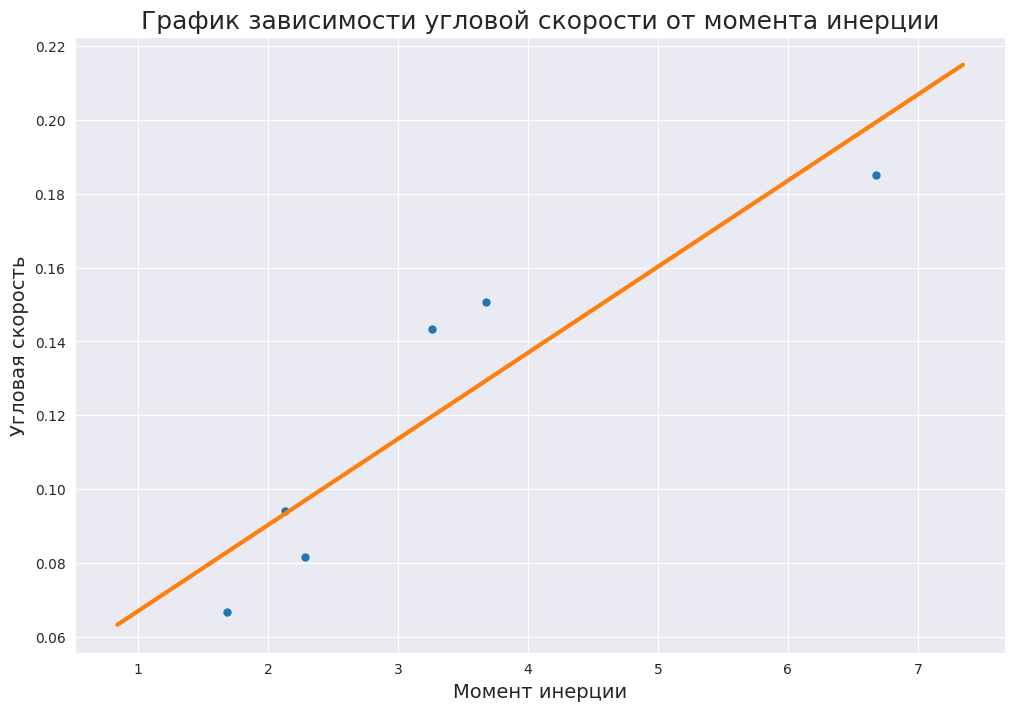

In [47]:
omega_np = np.array(grouped_data.omega)
momentum_np = np.array(grouped_data.momentum)

coefs = np.polyfit(momentum_np, omega_np, 1)

x_lsq = np.linspace(momentum_np.min() * 0.5, momentum_np.max() * 1.1, 100)

y_lsq = np.polyval(coefs, x_lsq)

fig = plt.figure(figsize=(12, 8))

plt.plot(momentum_np, omega_np, 'o', markersize=5)

legenda = f"y = {round(coefs[0], 4)}x + {round(coefs[1], 4)}"

plt.plot(x_lsq, y_lsq, label=legenda, linewidth=3)

plt.title('График зависимости угловой скорости от момента инерции', fontsize=18)
plt.xlabel('Момент инерции', fontsize=14)
plt.ylabel('Угловая скорость', fontsize=14)
plt.grid(True)

plt.show()

`np.polyfit` также умеет оценивать погрешности! Если точнее, он возвращает матрицу ковариаций для метода наименьших квадратов. Не будем углубляться в математику, главное знать, что на диагонали у неё стоят дисперсии полученных коэффициентов. Для получения собственно погрешности $\sigma$ необходимо взять корень из этих дисперсий.

Также стоит упомянуть про параметр `W`, задающий веса точек для оценки. Если известны ошибки $y_{error}$, можно задать веса как $W = 1 / y_{error}$, и прямая получится ещё более точной. Чтобы учесть ещё и ошибки по $x$, нужны, к сожалению, уже другие методы (но скорее всего, вам не понадобятся даже ошибки по $y$).

Представим, что произошла неприятность, и погрешности возросли в 10 раз!

In [48]:
grouped_data['sigma_down'] *= 10
grouped_data['sigma_momentum'] *= 10



Теперь вам нужно нарисовать график зависимости $\Omega_{down} (M_{down})$ <b>(не $\Omega(M)$!)</b> для точек с крестами погрешностей, а также построить не только прямую по оценке наименьших квадратов, а ещё и учесть погрешности оценок коэффициентов! Т.е. нужно построить три прямых: $k \cdot x + b$, которую выдал МНК, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, $(k + \sigma_k) \cdot x + (b + \sigma_b)$, и закрасить промежуток между этими прямыми (в этом вам поможет функция plt.fill_between). Остальное оформление оставьте таким же, как в предыдущем задании.

_Примечание: часто в МНК не смотрят на погрешность $b$, оставляя только $\sigma_k$._

<center><img src='https://drive.google.com/uc?export=view&id=1SriaMzJah7F610ocIK_O1-HqqtMQgxlg' width=600>

Пример получившегося графика</center>

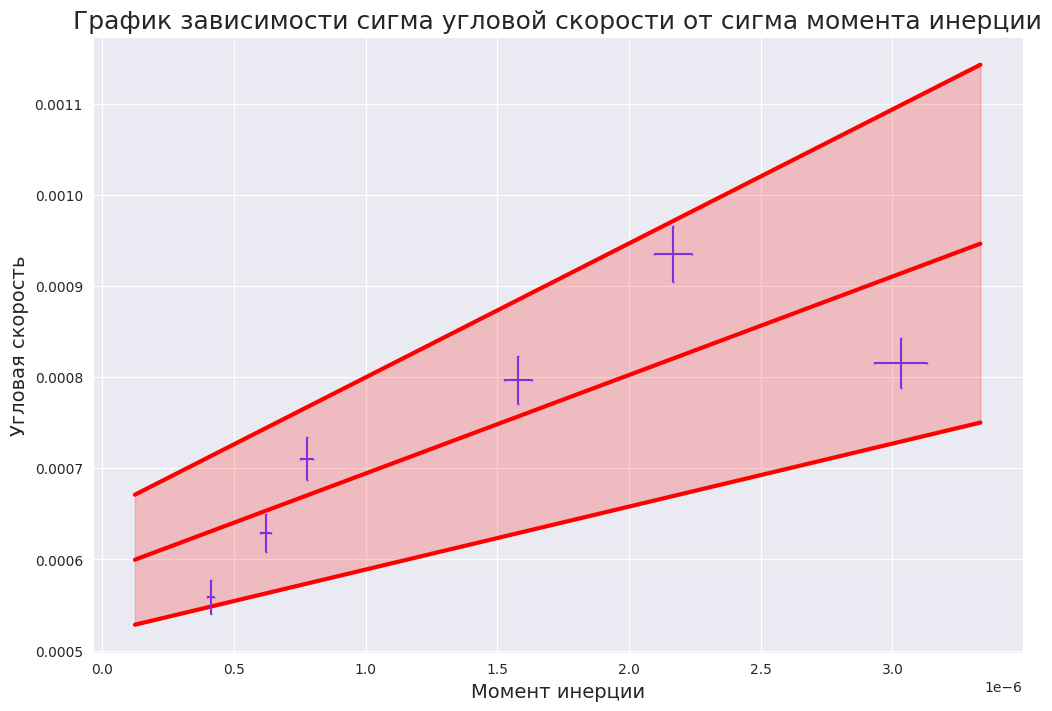

In [49]:
omega_down_np = np.array(grouped_data.omega_down)
momentum_down_np = np.array(grouped_data.momentum_down)

coefs, cov  = np.polyfit(momentum_down_np, omega_down_np, 1, cov=True)

x_lsq = np.linspace(momentum_down_np.min() * 0.3, momentum_down_np.max() * 1.1, 100)

lsq_stds = np.sqrt(np.diag(cov))

k, b = coefs
sigma_k, sigma_b = lsq_stds
y_lsq = np.polyval([k, b], x_lsq)
y_lsq_lower = np.polyval([k - sigma_k, b - sigma_b], x_lsq)
y_lsq_upper = np.polyval([k + sigma_k, b + sigma_b], x_lsq)

fig = plt.figure(figsize=(12, 8))

legenda = f"y = {round(coefs[0], 4)}x + {round(coefs[1], 4)}"

plt.plot(x_lsq, y_lsq, label=legenda, color='red', linewidth=3)
plt.plot(x_lsq, y_lsq_lower, color='red', linewidth=3)
plt.plot(x_lsq, y_lsq_upper, color='red', linewidth=3)
plt.fill_between(x_lsq, y_lsq_lower, y_lsq_upper, color='red', alpha=0.2)
plt.errorbar(momentum_down_np, omega_down_np, xerr=momentum_down_np/30, yerr=omega_down_np/30, color='#8a2be2', fmt='x', markersize=1, capsize=1)

plt.title('График зависимости сигма угловой скорости от сигма момента инерции', fontsize=18)
plt.xlabel('Момент инерции', fontsize=14)
plt.ylabel('Угловая скорость', fontsize=14)
plt.grid(True)


plt.show()

# 3. Работа с датасетом (3 балла)

Датасет ирисов использовался в статье Р.А. Фишера 1936 года «Использование множественных измерений в таксономических задачах», а в наши дни часто используется начинающими аналитиками данных.

В наборе данных включены три вида ирисов по 50 образцов каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом датасете:

Идентификатор (Id) \\
Длина чашелистика, см (SepalLengthCm) \\
Ширина чашелистика, см (SepalWidthCm) \\
Длина лепестка, см (PetalLengthCm) \\
Ширина лепестка, см (PetalWidthCm) \\
Вид (Species) \\

<font color='red'>ВНИМАНИЕ!</font> Все графики в этой части должны быть подписаны, а на осях должны быть подписи на русском языке.

In [ ]:
sns.set_style("darkgrid")

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# колонки id нет
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Давайте проверим, сколько у нас разных видов ирисов в итоге - должно быть 3 по 50 штук каждый. Воспользуйтесь `value_counts` , чтобы посмотреть, какие есть возможные значения у колонки species.

In [ ]:
iris['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


## 3.1 Графики длины и ширины лепестка ириса

Давайте попробуем сравнить, связаны ли ширина и длина лепестков - воспользуйтесь `sns.scatterplot`, чтобы отобразить на оси OXY значения. Не забудьте подписать график и оси!

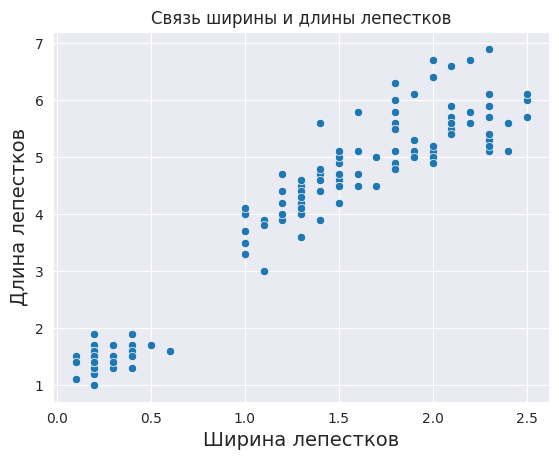

In [ ]:
sns.scatterplot(data=iris, x='petal_width', y='petal_length')
plt.title('Связь ширины и длины лепестков')
plt.xlabel('Ширина лепестков', fontsize=14)
plt.ylabel('Длина лепестков', fontsize=14)
plt.show()

Напишите, какие выводы можно сделать из графика. Чего графику не хватает, чтобы он был информативным?

<font color='red'>По данному графику можно понять что разница между длиной и шириной лепестка умноженной на 4 является не большой, и разнится только к размеру. Для более информативного представления информации не хватает подписи вида ириса, с ним можно лучше разделить результат анализа и сопоставлять размер ириса с видом. </font>

Давайте попробуем другие графики для тех же целей из библиотеки seaborn - `sns.jointplot`; кроме того, попробуйте выделить цветом точки на графике в зависимости от вида ириса - воспользуйтесь `sns.facetgrid`. В следующих ячейках выведите эти два графика и проанализируйте.

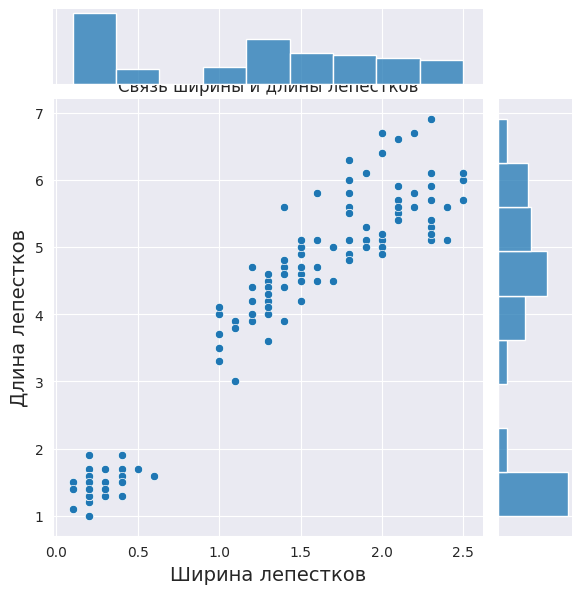

In [ ]:
sns.jointplot(data=iris, x='petal_width', y='petal_length')
plt.title('Связь ширины и длины лепестков')
plt.xlabel('Ширина лепестков', fontsize=14)
plt.ylabel('Длина лепестков', fontsize=14)
plt.show()

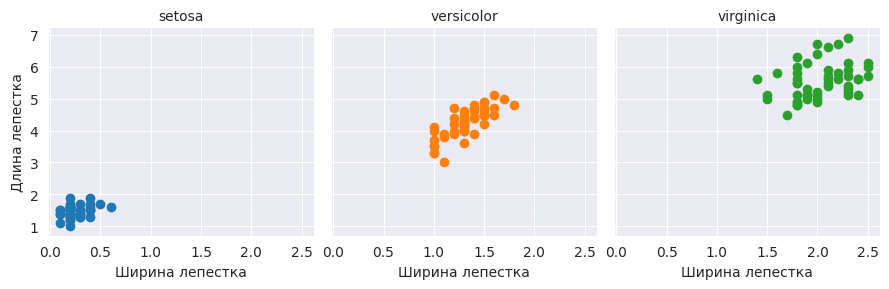

In [ ]:
graph = sns.FacetGrid(iris, col="species", hue="species")
graph.map(plt.scatter, "petal_width", "petal_length")
graph.set_titles(col_template="{col_name}")
graph.set_axis_labels("Ширина лепестка", "Длина лепестка")
plt.show()

Какие выводы можно сделать из этих графиков? Какой из 3 методов - scatterplot, jointplot, facetgrid вам кажется лучше?

<font color='red'> По этим графикам можно сделать следущий вывод, самое сильное скопление размеров лепестка у вида ирисов "setosa" и длина будет около 1.5, также размер данного ириса не пересекается с видами других ирисов. У ирисов "versicolor" и "virginica" размеры более разрозненные однако имеют пересечения между друг другом, за счет этого самое больше скопление размеров ирисов между двумя этими видами будет где то 4.5 длины. Также если выстраивать ирисы по размеру и обхвата размеров, будет один порядок: "setosа", "versicolor", "virginica".

По моему мнению самый лучший график получился у метода facetgrid, он более информативный и объемный, чем у остальных.   </font>

## 3.2 Графики распределений значений длины лепестка

Постройте график "ящика с усами" - `sns.boxplot` и его аналог - `sns.violinplot`. По оси Ox должны находиться возможные виды ирисов, по оси Oy.

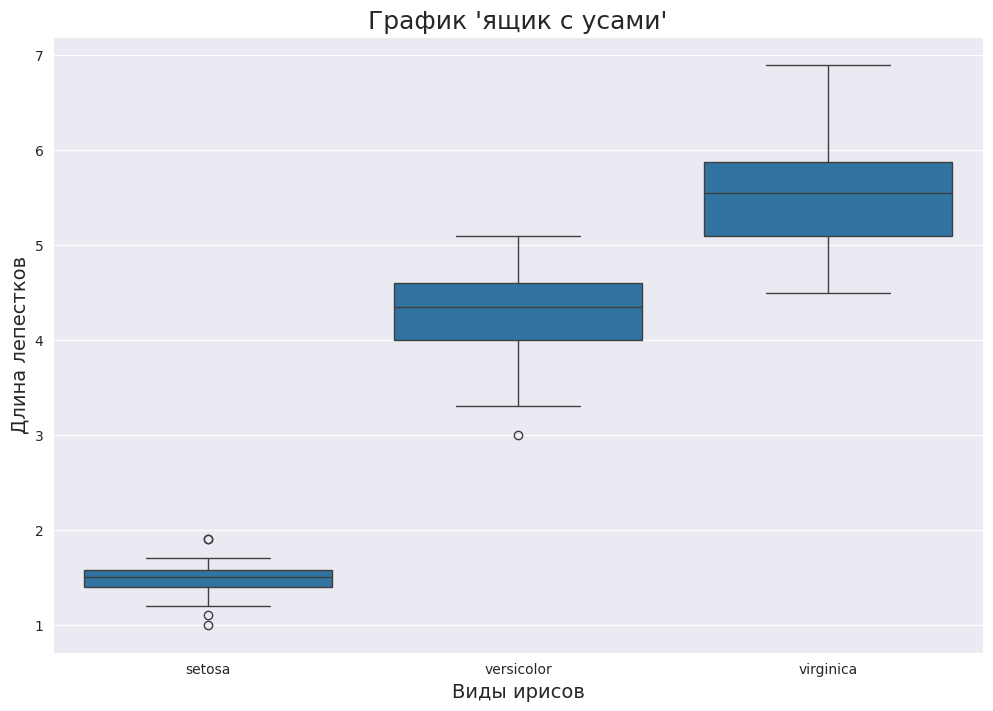

In [ ]:
fig = plt.figure(figsize=(12, 8))

sns.boxplot(x="species", y="petal_length", data=iris)
plt.title("График 'ящик с усами'", fontsize=18)
plt.xlabel('Виды ирисов', fontsize=14)
plt.ylabel('Длина лепестков', fontsize=14)
plt.show()

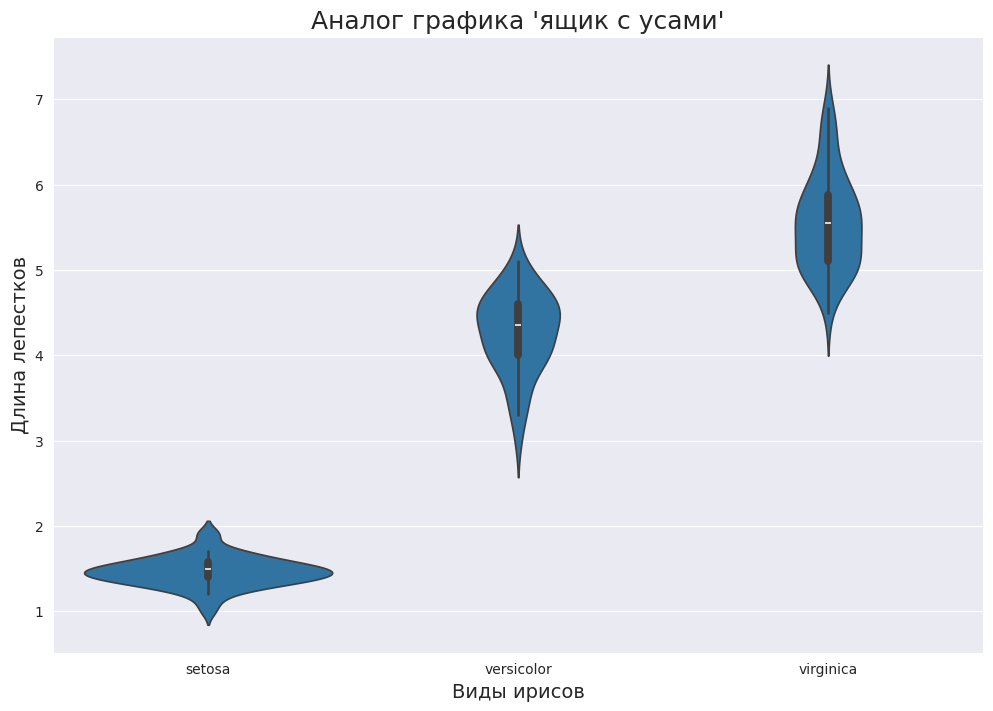

In [ ]:
fig = plt.figure(figsize=(12, 8))

sns.violinplot(x="species", y="petal_length", data=iris)
plt.title("Аналог графика 'ящик с усами'", fontsize=18)
plt.xlabel('Виды ирисов', fontsize=14)
plt.ylabel('Длина лепестков', fontsize=14)
plt.show()

Сравните два вида графиков. Какой более информативный, а какой - более красивый визуально по вашему мнению? Какую информацию мы можем получить из этих графиков?

<font color='red'> По моему мнению более информативный и визуально красивый второй вариант графика. Он более плавный и более понятно предоставляет информацию.

Мы можем узнать насколько плотно или обширно распределение длины лепестков в зависимости от вида ириса. </font>

## 3.3 Попарные графики взаимосвязи признаков


Давайте попробуем построить большую табличку из графиковв размера 4 на 4, где у нас находятся все возможные пары признаков (длина/ширина лепестка, длина/ширина чашелистика). Для этого воспользуйтесь `sns.pairplot` и не забудьте указать параметр `hue`.

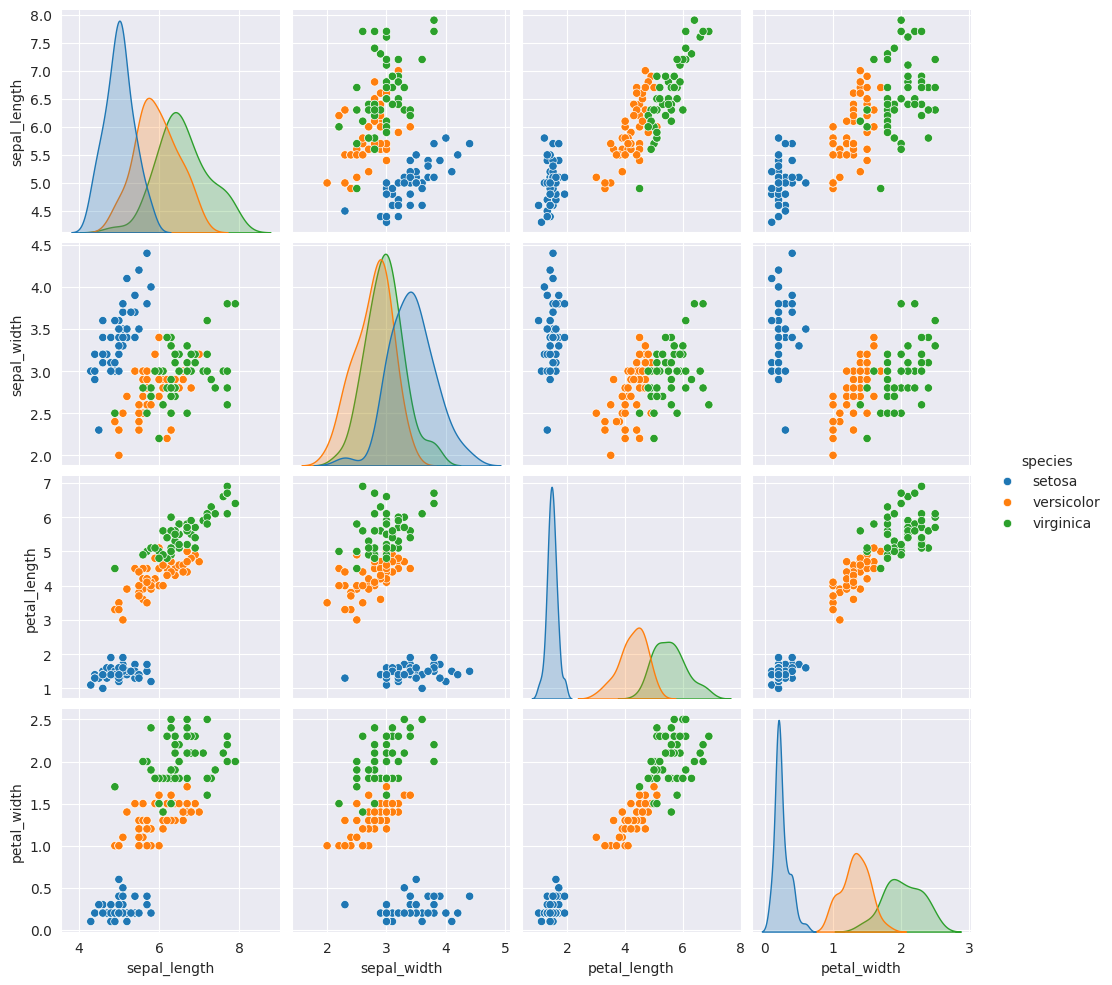

In [ ]:
graph = sns.pairplot(iris, hue="species")

plt.show()

Какую информацию о взаимосвязи признаков вы можете почерпнуть из полученного графика?

<font color='red'> Изучая график можно заметить не по средственную зависимость длины и ширины лепестка. Также можно заметить как информация о размерах чашелистника сильно смешивается между видами "versicolor" и "virginica", однако вид "setosa" обособлен от них и легко различим. </font>

Какие графики находятся на диагонали этой таблицы?

<font color='red'> На диогоналях таблицы должен быть расположен график о размерах длины/ширины лепестка/чашелистника между им же самим. Для того чтобы сделать таблицу более информативной на диогоналях вместо этого представлено распределение данного показателя в зависимости от вида.   </font>

Попробуй заменить графики на диагонали таблицы на другие, возможно, более информативные (подсказка: в документации у `sns.pairplot` для этого есть специальный параметр). Выведи полученный график.

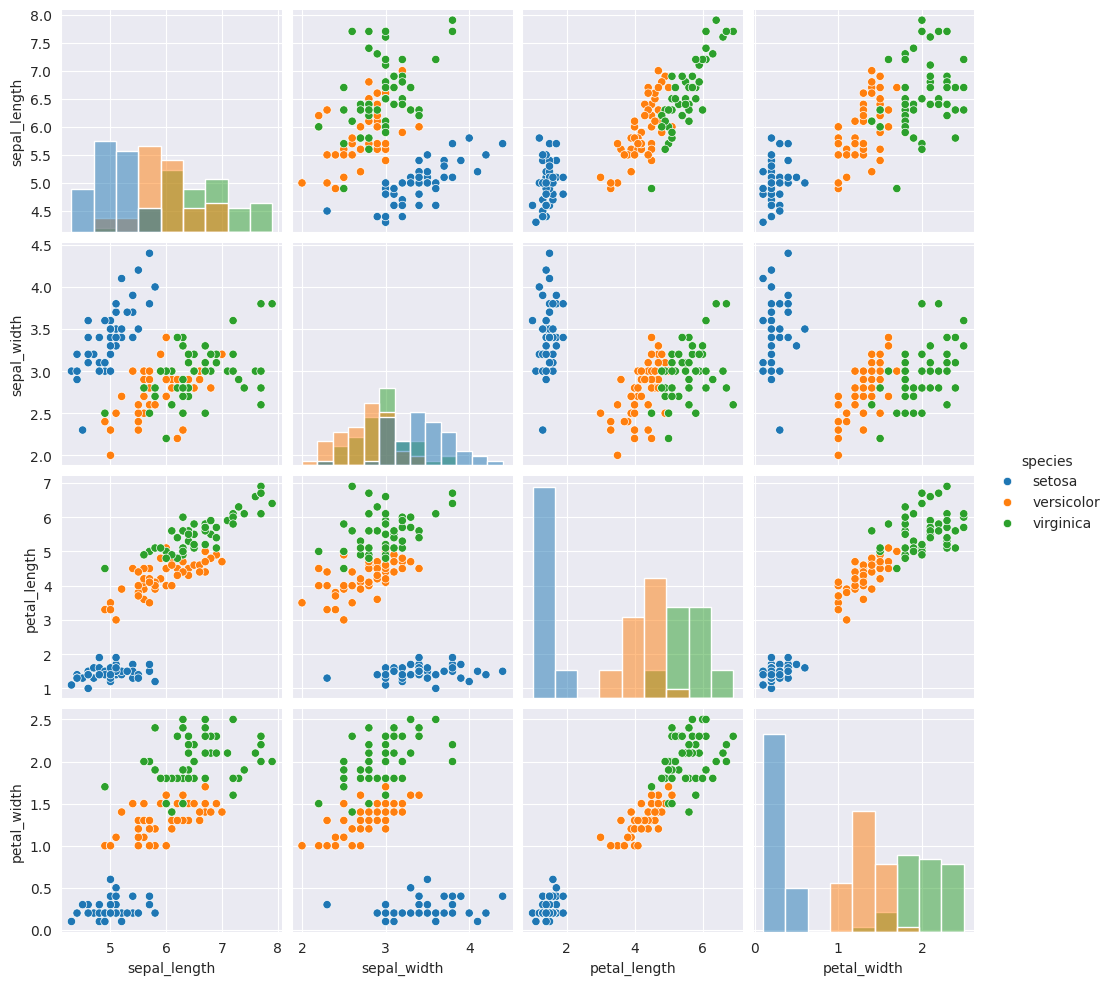

In [ ]:
graph = sns.pairplot(iris, hue="species", diag_kind="hist")

plt.show()

Какие графики теперь находятся на диагонали таблицы? Получилось ли более информативно?

<font color='red'> Теперь на диогонали таблицы находятся гистограмы распределения выбраного размера от вида. Я считаю, что данный график не более информативен, чем предыдущий, однако он может понадобиться в случаях более точного понимания числовой информации. </font>